In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
train_data = pd.read_csv('train.csv')

In [40]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# DataFrame

- Series가 1차원이면 DataFrame은 2차원으로 확대된 버젼
- Execl spreadsheet와 비슷한 형식
- 2차원이기 때문에 인덱스가 row, column로 구성됨
    - row는 각 개별 데이터를 column은 개별 속성을 의미
- Data Analysis, Machine Learning에서 data 변형을 위해 가장 많이 사용

**dataframe 데이터 파악하기**
- shape 속성(row, column)
- describe 함수 - 숫자형 데이터의 통계치 계산
- info : 데이터 타입, 각 아이템의 개수 등 출력

**index**
- index 속성
- 각 아이템을 특정할 수 있는 고유의 값을 저장

**column**
- columns 속성
- 각각의 특성(feature)을 나타냄

# 1. Dataframe 데이터 생성하기

**dictionary로 생성하기**
- dict의 key -> column

In [22]:
data = {'a':[1,2,3], 'b':200, 'c':300}
pd.DataFrame(data, index=['x','y','z'])

,a,b,c
x,1,200,300
y,2,200,300
z,3,200,300


**Series로 생성하기**
- 각 Series의 인덱스 -> column

In [23]:
a = pd.Series([100,200,300],['a','b','c'])
b = pd.Series([101,200,300],['a','b','c'])
c = pd.Series([102,200,300],['a','b','d'])

pd.DataFrame([a,b,c])

,a,b,c,d
0,100.0,200.0,300.0,NaN
1,101.0,200.0,300.0,NaN
2,102.0,200.0,NaN,300.0


# 2. CSV 데이터로부터 dataframe 생성하기

**read_csv 함수 파라미터**
- sep : 각 데이터 값을 구별하기 위한 구분자 설정
- header : header를 무시할 경우 None 설정
- **index_col : index로 사용할 column 설정**
- **usecols : 실제로 dataframe에 로딩할 columns만 설정**

# 3. 원하는 column만 선택하기

**column 선택하기**
- 기본적으로 [ ]는 column을 추출
- 컬럼 인덱스일 경우 인덱스의 리스트 사용 가능
    - 리스트를 전달할 경우 결과는 dataframe (복수의 컬럼 선택)
    - 하나의 컬럼명을 전달할 경우 결과는 Series

# 4. 원하는 row만 선택하기

**dataframe slicing**
- dataframe의 경우 기본적으로 [ ] 연산자가 column 선택에 사용
- 하지만, **slicing은 row 레벨로 지원**

In [24]:
train_data[:5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**row 선택하기**
- Series의 경우 [ ]로 row 선택이 가능하나, Dataframe의 경우 기본적으로 column을 선택하도록 설계
- .loc, .iloc으로 row 선택 가능
    - loc : 인덱스 '자체'를 사용
    - iloc : '0 based index'로 사용 (숫자로만 표현할것)
    - 이 두 함수는 ,를 사용하여 column 선택도 가능

**row, column 동시에 선택하기**
- loc, iloc 속성을 이용할 때, 콤마를 이용하여 둘 다 명시 가능

In [25]:
train_data.loc[[0,30,50], ['Survived', 'Name']]

,Survived,Name
0,0,"Braund, Mr. Owen Harris"
30,0,"Uruchurtu, Don. Manuel E"
50,0,"Panula, Master. Juha Niilo"


In [26]:
train_data.iloc[[0,30,50], [1, 3]]

,Survived,Name
0,0,"Braund, Mr. Owen Harris"
30,0,"Uruchurtu, Don. Manuel E"
50,0,"Panula, Master. Juha Niilo"


# 5. Boolean selection 데이터 선택하기

**boolean selection 으로 row 선택하기**
- numpy에서와 동일한 방식으로 해당 조건에 맞는 row만 선택

In [27]:
train_data[(train_data['Pclass'] == 3) & (train_data['Age'] >= 30) & (train_data['Age'] < 40)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,NaN,S
18,19,0,3,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1,0,345763,18.0000,NaN,S
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1,5,347077,31.3875,NaN,S
74,75,1,3,"Bing, Mr. Lee",male,32.0,0,0,1601,56.4958,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
843,844,0,3,"Lemberopolous, Mr. Peter L",male,34.5,0,0,2683,6.4375,NaN,C
847,848,0,3,"Markoff, Mr. Marin",male,35.0,0,0,349213,7.8958,NaN,C
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q


# 6. 새 column 추가 _ 삭제하기

**새 column 추가하기**
- [_] 사용하여 추가하기
- insert 함수 사용하여 **원하는 위치에 추가하기**

In [28]:
train_data['age_double'] = train_data['Age'] * 2

In [29]:
# 3번째 칼럼 위치에 추가
train_data.insert(3, 'Fare10', train_data['Fare']/10)

**column 삭제하기**
- drop 함수 사용하여 삭제
    - 리스트를 사용하여 멀티플 삭제 가능

In [30]:
train_data.drop('age_double', axis=1)

,PassengerId,Survived,Pclass,Fare10,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,0.72500,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,7.12833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,0.79250,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,5.31000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,0.80500,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,1.30000,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,3.00000,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,2.34500,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,3.00000,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# 7. column간 상관관계 계산하기

** 변수(column) 사이의 상관계수(correlation)**
- corr 함수를 통해 상관계수 연산(-1~1 사이의 결과)
    - 연속성(숫자형)데이터에 대해서만 연산
    - 인과관계를 의미하진 않음

In [31]:
train_data.corr()

,PassengerId,Survived,Pclass,Fare10,Age,SibSp,Parch,Fare,age_double
PassengerId,1.000000,-0.005007,-0.035144,0.012658,0.036847,-0.057527,-0.001652,0.012658,0.036847
Survived,-0.005007,1.000000,-0.338481,0.257307,-0.077221,-0.035322,0.081629,0.257307,-0.077221
Pclass,-0.035144,-0.338481,1.000000,-0.549500,-0.369226,0.083081,0.018443,-0.549500,-0.369226
Fare10,0.012658,0.257307,-0.549500,1.000000,0.096067,0.159651,0.216225,1.000000,0.096067
Age,0.036847,-0.077221,-0.369226,0.096067,1.000000,-0.308247,-0.189119,0.096067,1.000000
SibSp,-0.057527,-0.035322,0.083081,0.159651,-0.308247,1.000000,0.414838,0.159651,-0.308247
Parch,-0.001652,0.081629,0.018443,0.216225,-0.189119,0.414838,1.000000,0.216225,-0.189119
Fare,0.012658,0.257307,-0.549500,1.000000,0.096067,0.159651,0.216225,1.000000,0.096067
age_double,0.036847,-0.077221,-0.369226,0.096067,1.000000,-0.308247,-0.189119,0.096067,1.000000


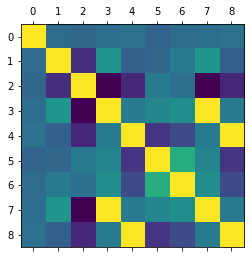

In [34]:
plt.matshow(train_data.corr())

# 8. NaN 데이터 처리

**NaN 값 확인**
- info 함수를 통하여 개수 확인
- isna함수를 통해 boolean 타입으로 확인

In [41]:
# true 값인 경우 NaN 값이다.
train_data.isna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


**NaN 처리 방법**
- 데이터에서 삭제
    - dropna 함수
- 다른 값으로 치환
    - fillna 함수

In [42]:
train_data.dropna()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [48]:
# 특정 칼럼에서 NaN이 나올 경우만 삭제
train_data.dropna(subset=['Age'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [50]:
# NaN 들어있는 칼럼 삭제
train_data.dropna(axis=1)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,7.2500
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,71.2833
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,7.9250
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,53.1000
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,8.0500
...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,0,0,211536,13.0000
887,888,1,1,"Graham, Miss. Margaret Edith",female,0,0,112053,30.0000
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,1,2,W./C. 6607,23.4500
889,890,1,1,"Behr, Mr. Karl Howell",male,0,0,111369,30.0000


**NaN 값 대체하기**
- 평균으로 대체하기
- 생존자/사망자 별 평균으로 대체하기

In [51]:
train_data['Age'].fillna(train_data['Age'].mean())

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

# 9. 숫자 데이터와 범주형 데이터의 이해

**숫자 데이터**
- 연속성을 가지는 숫자로 이루어진 데이터 (age, fare 등)

**범주형 데이터**
- 연속적이지 않은 값을 가지는 데이터를 의미
- 어떤 경우, 숫자형 타입이라 할지라도 개념적으로 범주형으로 처리해야할 경우가 있음

# 10. 숫자 데이터의 범주형 데이터화

**Pclass 변수 변환하기**
- astype 사용하여 간단히 타입만 변환

In [54]:
train_data['Pclass'].astype(str)

0      3
1      1
2      3
3      1
4      3
      ..
886    2
887    1
888    3
889    1
890    3
Name: Pclass, Length: 891, dtype: object

**Age 변수 변환하기**
- 변환 로직을 함수로 만든 후, apply 함수로 적용

In [56]:
import math

def age_categorize(age):
    if math.isnan(age):
        return -1
    return math.floor(age / 10) * 10

In [57]:
train_data['Age'].apply(age_categorize)

0      20
1      30
2      20
3      30
4      30
       ..
886    20
887    10
888    -1
889    20
890    30
Name: Age, Length: 891, dtype: int64

# 11. 범주형 데이터 전처리하기 (one-hot encodig)

**One-hot encoding**
- 범주형 데이터는 분석단계에서 계산이 어렵기 때문에 숫자형으로 변경이 필요함
- 범주형 데이터의 각 범주(category)를 column레벨로 변경
- 해당 범주에 해당하면 1, 아니면 0으로 채우는 인코딩 기법
- **pandas.get_dummies 함수** 사용
    - **drop_first : 첫번째 카테고리 값은 사용하지 않음**

In [58]:
pd.get_dummies(train_data, columns=['Pclass', 'Sex', 'Embarked'])

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1,0,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,1,0,0,0,1
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,0,1,0,0,1,0,0,1
887,888,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,1,0,0,1,0,0,0,1
888,889,0,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,0,0,1,1,0,0,0,1
889,890,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,1,0,0,0,1,1,0,0
